# Приоритизация гипотез, запуск A/B-теста и анализ результатов.

### Описание проекта

В файле hypothesis.csv 9 подготовленных гипотез по увеличению выручки интернет-магазина с указанными параметрами:\
Reach, Impact, Confidence, Effort. Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

#### Описание данных

Файл /datasets/hypothesis.csv.\
Hypothesis — краткое описание гипотезы;\
Reach — охват пользователей по 10-балльной шкале;\
Impact — влияние на пользователей по 10-балльной шкале;\
Confidence — уверенность в гипотезе по 10-балльной шкале;\
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import math as mth

In [2]:
#загрузим данные в переменную 'data'
try:
   data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
   data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')

In [3]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [4]:
#отобразим длинные названия
pd.set_option('display.max_colwidth', None)

In [5]:
#выведем  
data.head(9)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


###  Приоритизация гипотез.

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


$$ICE = \frac{Impact * Confidence}{Efforts}$$

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

In [5]:
#создадим и отсортируем по новому столбцу ICE 
data['ICE'] = (data['impact'] * data['confidence'])/data['efforts']
data.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Наиболее песпективные гипотезы по ICE: 8,0 и 7.

#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

Метод RICE дополнен (reach, «охват»), скольких пользователей затронет изменение 

In [8]:
#создадим и отсортируем по новому столбцу RICE
data['RICE'] = (data['reach']*data['impact'] * data['confidence'])/data['efforts']
data.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


#### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE.


Перспективны гипотезы № 7, 2, 0 и 6. Отметим гипотезу 7 с показателем RICE превосходящим вдвое следующую гипотезу 2.\
Причина в высоком параметре Reach - охват пользователей, высок и  confidence безусловно важнейшие показатели приоритета гипотез.

"Добавить форму подписки на все основные страницы сайта, чтобы собрать базу клиентов для email-рассылок" технически несложно -\
потребуется максимум 2 часа работы программиста для создания формы на конструкторе и еще 2 на адаптацию к главным страницам сайта,\
итого около 4 часов.
Никаких изменений в операционных процессах не потребуется, форма будет добавлена на сайт в режиме реального времени.\
Учтем высочайший показатель охвата, высокую  уверенность и силу влияния.   
Выбираем для эксперимента гипотезу №7, несомненно самую оптимальную для проведения теста.

###  Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.


Файл /datasets/orders.csv.\
transactionId — идентификатор заказа;\
visitorId — идентификатор пользователя, совершившего заказ;\
date — дата, когда был совершён заказ;\
revenue — выручка заказа;\
group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.\
date — дата;\
group — группа A/B-теста;\
visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [11]:
#прочтем данные из файлов с результатами  A/B-тестирования, переведем даты в нужный формат
try:
   orders = pd.read_csv('/datasets/orders.csv', sep=',')
except:
   orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')
   orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

try:
   visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
   visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')
   visitors['date'] = visitors['date'].map(
   lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
#приведем названия столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()

In [13]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим пропуски в значениях. Обратимся к датафреймам по очереди

In [17]:
orders.isnull().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [18]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков нет, проверим на дубликаты

In [19]:
orders.duplicated().sum()

0

In [20]:
visitors.duplicated().sum()

0

Отлично, дубликатов нет

In [21]:
#выведем количество уникальных пользователей по каждой группе
orders.groupby('group').agg({'visitorid':'nunique'})

,visitorid
group,
A,503
B,586


Посчитаем дубликаты пользователей в группах тестирования

In [22]:
orders.groupby('visitorid').agg({'group':'nunique'}).query('group>1').count()

group    58
dtype: int64

In [23]:
#запишем дубликаты в группах в переменную
od = orders.groupby('visitorid').agg({'group':'nunique'}).query('group>1')

In [24]:
orders.shape

(1197, 5)

In [22]:
#перезапишем orders без дубликатов
orders = orders.query('visitorid not in @od.index')

In [25]:
orders.shape

(1197, 5)

Набор данных достаточен. Данные прошли предобработку и соответствуют необходимому уровню качества для дальнейшего интеллектуального анализа и проверке гипотез.

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.



Чтобы построить графики, нужно собрать кумулятивные данные. 

In [26]:
#создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [28]:
#получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [29]:
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Объявим датафрейм cumulativeData со столбцами:

date — дата;\
group — группа A/B-теста (A или B);\
orders — кумулятивное количество заказов на указанную дату в указанной группе;\
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;\
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);\
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.


In [30]:
#объединим кумулятивные данные в одной таблице и присвоим ее столбцам названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [31]:
#Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

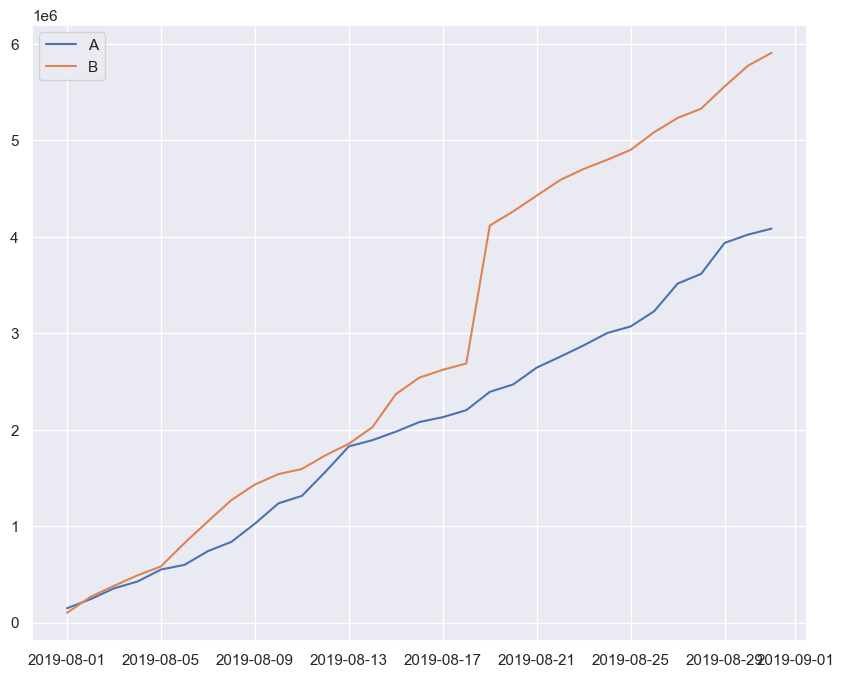

In [32]:
#строим график кумулятивной выручки групп А и В
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

До середины теста выручка обеих групп почти равномерно увеличивается с небольшим преимуществом сегмента В. Далее идет резкий рост выручки В, это может означать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Скорее всего, аномальные заказы влияют на результаты.

#### Построим график кумулятивного среднего чека по группам.



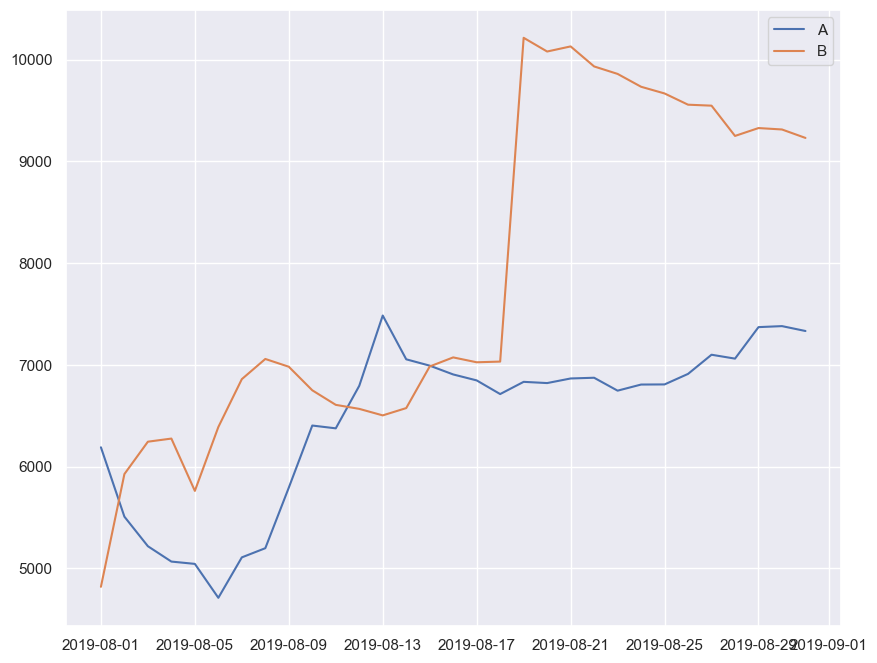

In [33]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Принимать решения нет смысла. Продолжим исследования.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.



In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
   cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

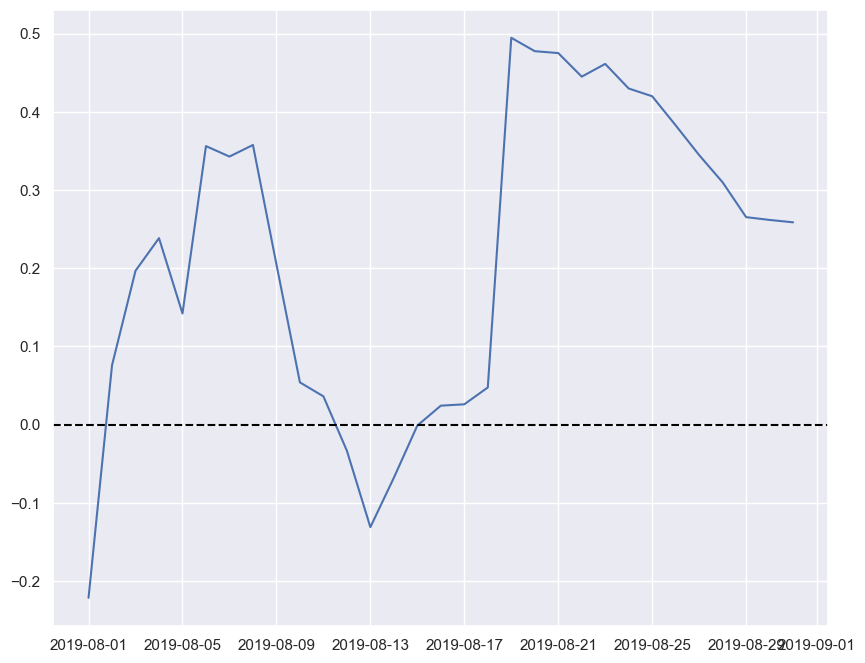

In [35]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
(
        mergedCumulativeRevenue['revenueB']/
        mergedCumulativeRevenue['ordersB'])/
        (mergedCumulativeRevenue['revenueA']/
        mergedCumulativeRevenue['ordersA'])-1
)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках графика результаты теста значительно и резко менялись, видим "скачки" в несколько дат. Видимо, именно тогда совершены аномальные заказы.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам.



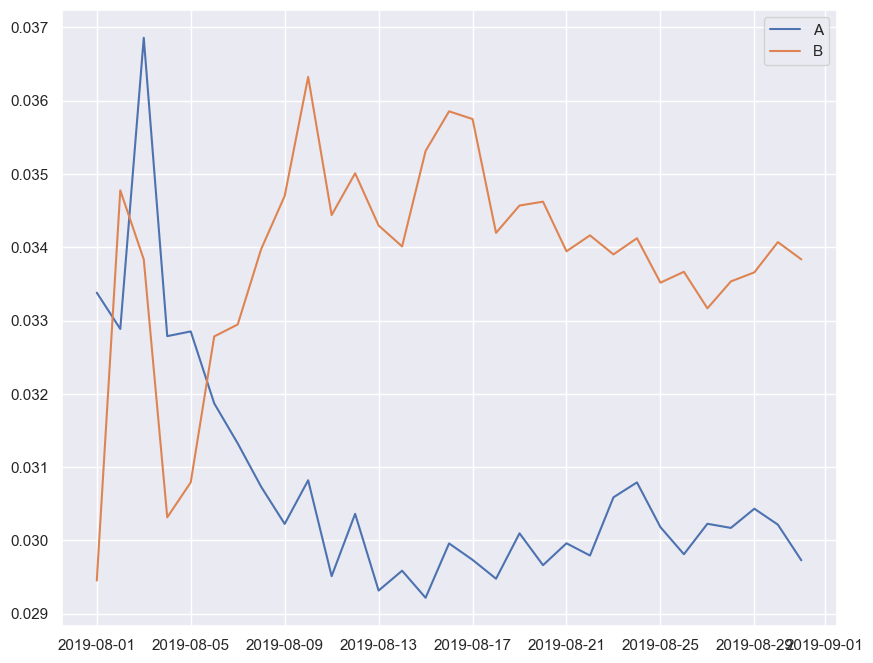

In [37]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['avgcumorduser'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['avgcumorduser'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avgcumorduser'], label='B')
plt.legend();

Есть всплески и падения, особенно в начале теста, указывающие на аномалии. Далее видим некоторую симметрию и превосходство группы В.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к A. 



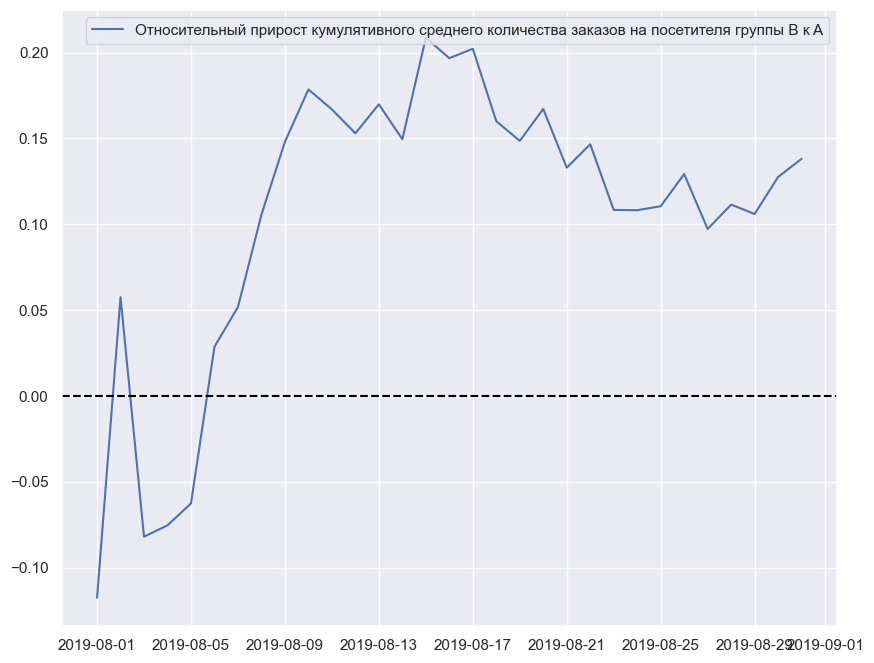

In [38]:
mergedCumulativeConv = cumulativeDataA[['date','avgcumorduser']].merge(cumulativeDataB[['date','avgcumorduser']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConv['date'], mergedCumulativeConv['avgcumorduserB']/mergedCumulativeConv['avgcumorduserA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B к A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--');

В начале теста группа В уступала, затем следует "скачёк", падение и уверенный рост с колебаниями и превосходством над группой А. Видимо именно в "скачки" совершены аномальные заказы.

#### Построим точечный график количества заказов по пользователям.


In [39]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'orders']

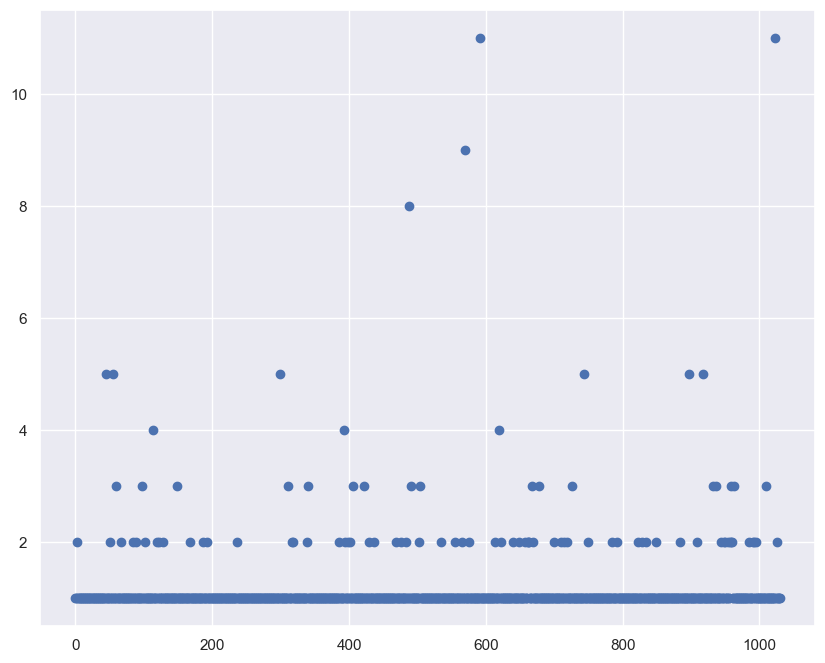

In [40]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']);

Большинство пользователей заказывали только один раз, велика доля пользователей с 2 заказами. С 3 встречаются гораздо реже. Точная доля неясна, посчитаем выборочные перцентили количества заказов на одного пользователя.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [41]:
np.percentile(ordersByUsers['orders'], [ 95, 99])

array([2., 4.])

Не более 5% пользователей делают больше 2х заказов. Это и будет граница количества аномальных заказов.

#### Построим точечный график стоимостей заказов.



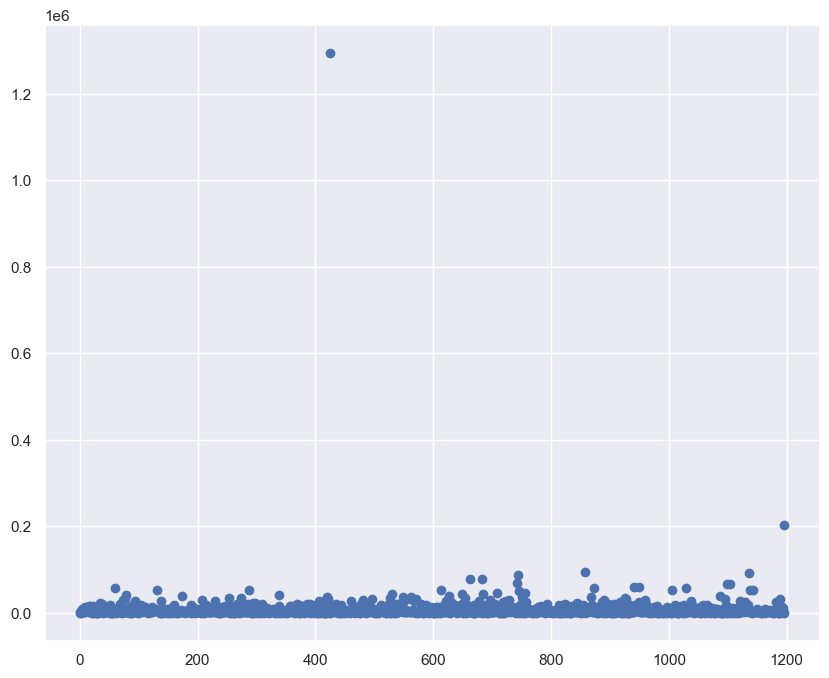

In [42]:
#Построим точечную диаграмму стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Предположения подтверждаются: видим аномально дорогие заказы выше 200000 и 1 200000!

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.



In [43]:
np.percentile(orders['revenue'], [ 95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 26785 и не более 1% дороже 53904. Дорогие заказы искажают результаты тестирования, при этом они редкость, попавшие  исключительно случайно. Исключим заказы дороже 30000.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами  по «сырым» данным.



Сформулируем гипотезы:\
Нулевая: различий в среднем количестве заказов между группами нет.\
Альтернативная: различия в среднем между группами есть.

Подготовим данные отдельно по группам теста

date — дата;\
ordersPerDateA — количество заказов в выбранную дату в группе A;\
revenuePerDateA — суммарная выручка в выбранную дату в группе A;\
ordersPerDateB — количество заказов в выбранную дату в группе B;\
revenuePerDateB — суммарная выручка в выбранную дату в группе B;\
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;\
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;\
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;\
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;\
visitorsPerDateA — количество пользователей в выбранную дату в группе A;\
visitorsPerDateB — количество пользователей в выбранную дату в группе B;\
visitorsCummulativeA  — количество пользователей до выбранной даты включительно в группе A;\
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B

In [40]:
#ежедневно пользователей
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
#ежедневно пользователей с накоплением
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [41]:
#ежедневно заказов
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#ежедневно заказов с накоплением
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [42]:
#объединим полученные данные
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [43]:
df.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [44]:
#создадим переменные
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

Переменная sample должна состоять из двух частей:\
Список с количеством заказов для каждого из пользователей: ordersByUsers['orders'].\
Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']).

In [45]:
#создадим объект pd.Series нужной длины, список индексов функцией np.arange()
#pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders') 

In [46]:
#последовательности объединим по строкам функцией pd.concat()
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [47]:
#применим критерий Манна-Уитни и округлим p-value
"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1], alternative="two-sided")

'0.011'

In [48]:
#относительный прирост среднего числа заказов группы B к группе A
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'0.160'

Вывод: p-value (0.011 < 0.05) меньше статистической значимости,\
следовательно, нулевую гипотезу о том, что значимых различий в среднем числе заказов между группами нет, отвергаем.\
Различия в среднем числе заказов между группами есть.\
Относительный выигрыш группы B равен 16%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 



Сформулируем гипотезы:\
Нулевая: различий в среднем чеке заказа между группами нет.\
Альтернативная: различия в среднем чеке между группами есть.

In [49]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")[1])

'0.829'

In [50]:
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.287'

Вывод: p-value (0.829 > 0.05) , больше стасистической значимости,
следовательно, нулевую гипотезу о том, что значимых различий в среднем чеке заказа между группами нет, не отвергаем.
Хотя средний чек группы B больше на 28.7% чека группы А.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.


Сформулируем гипотезы по очищенным данным:\
Нулевая: различий в среднем количестве заказов между группами нет.\
Альтернативная: различия в среднем между группами есть.\
Статистическая значимость = 0.05

В пунктах 3.7 и 3.9 мы считали 95 и 99 перцентили и приняли аномальное количество заказов на одного пользователя больше двух, аномальный средний чек больше 30000. 

In [51]:
#сделаем срез пользователей с числом заказов больше 2 — usersWithManyOrders
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
#срез пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorid']

In [52]:
#и объединим по строкам функцией pd.concat()
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [53]:
#выведем аномальных пользователей
abnormalUsers.head()

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
Name: visitorid, dtype: int64

In [54]:
# всего аномальных пользователей
abnormalUsers.shape[0]

76

In [55]:
#подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [56]:
#применим статистический критерий Манна-Уитни
'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.014'

In [57]:
#применим статистический критерий Манна-Уитни  с параметром двустороннего теста
'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1])

'0.014'

In [58]:
#относительный прирост среднего числа заказов группы B к группе A
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.181'

Вывод: p-value по сравнению с сырыми данными вырос с 0.011 до 0.014, но остался меньше статистической значимости,\
следовательно, нулевую гипотезу о том, что значимых различий в среднем числе заказов между группами нет, отвергаем.\
Есть различия в среднем числе заказов между группами по очищенным данным.\
Относительный пророст числа заказов группы B к группе А составил 18% 

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 



Сформулируем гипотезы по чистым данным:\
Нулевая: различий в среднем чеке заказа между группами нет.\
Альтернативная: различия в среднем чеке между группами есть.\
Статистическая значимость = 0.05

In [59]:
'{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers))
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )

'0.617'

In [60]:
"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'-0.060'

Вывод: P-value уменьшился с 0.829 до 0.617 но остался выше статистической значимости  0.617 > 0.05, следовательно,\
нулевую гипотезу не отвергаем.\
Значимых различий в среднем чеке заказа между группами в чистых данных нет.\
После очистки, разница между сегментами сократилась с 28.7% до -0.06%.\
Устранение аномалий нивелировало разницу в среднем чеке. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
Несколько важных моментов, которые стоит доработать:
    
1) нам важно сформулировать по паре гипотез перед каждом из 4 тестов, перед их проведением, у тебя пока есть формулировка гипотез для тестов на неочищенных данных, давай также добавим формулировку гипотез для тестов на очищенных данных.
    
2) интерпретацию тестов лучше давать более полную, с привязкой к гипотезам (т.е. не "результат почти не изменился", а с учетом того, какие это были данные очищенные или не очищенные, что мы тестировали (конверсию, заказы), и какую  гипотезу отвергаем)

<div class="alert alert-info">
<b>
Спасибо, абсолютно правильное замечание, исправил

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Согласна с формулировками гипотез:)

</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Несколько рекомендацией по этому шагу анализа (носят рекомендательный характер и являются развивающей обратной связью, при желании и возможности можно имплементировать часть (или все) рекомендации, а можно просто взять на вооружение🙌):

* есть особенность в реализации теста Манна-Уитни <code>stats.mannwhitneyu</code>, тест имеет параметр <code>alternative</code>, по-умолчанию, он принимает значение <code>None</code> для совместимости, но в таком случае тест выполняет проверку похожую на одностороннюю, что не совсем корректно для нашего теста. Более корректные результаты можно получить, используя <code>alternative="two-sided"</code>
    
Подробнее о проверках можно почитать вот в этой [статье](http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm#:~:text=An%20alternative%20hypothesis%20may%20be,the%20direction%20does%20not%20matter.) 
        
В новой версии библиотеки scipy этот аргумент специфицируется по дефолту. В более старых версиях - его важно специфицировать. 
   
* и еще про проблему выбора теста (одностороннего или двустороннего ты можешь почитать по ссылкам ниже):
        
`A two-tailed test is appropriate if you want to determine if there is any difference between the groups you are comparing. For instance, if you want to see if Group A scored higher or lower than Group B, then you would want to use a two-tailed test. This is because a two-tailed test uses both the positive and negative tails of the distribution. In other words, it tests for the possibility of positive or negative differences.`

`A one-tailed test is appropriate if you only want to determine if there is a difference between groups in a specific direction. So, if you are only interested in determining if Group A scored higher than Group B, and you are completely uninterested in possibility of Group A scoring lower than Group B, then you may want to use a one-tailed test.`
    
Источник: https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/#:~:text=This%20is%20because%20a%20two,groups%20in%20a%20specific%20direction.
    
И еще несколько ссылок по этому вопросу:
    
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html
    
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/
    
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/
        
* чтобы аргументировать применение теста Манна-Уитни (один из аргументов - ненормальность распределения), можно проверить выборки на нормальность распределения, с этой задачей справится тест Шапиро:
        
реализация на Python
        
https://www.statology.org/shapiro-wilk-test-python/
        
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
        
https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5

#### Остановить тест, зафиксировать победу  группы В.


Вывод: совместно с отделом маркетинга мы подготовили список из 9 гипотез для увеличения выручки интернет-магазина.\
По результатам приоритизации гипотез была выбрана №7, с показателем RICE превосходящим вдвое следующую гипотезу.\
Безусловно №7 самая оптимальная для проведения теста, показавшая высочайший уровень охвата, высокие уверенность и силу влияния.\
Кроме того "Добавить форму подписки на все основные страницы сайта, чтобы собрать базу клиентов для email-рассылок " технически несложно - потребуется максимум 2 часа работы программиста для создания формы на конструкторе и еще 2 на адаптацию к главным страницам сайта, итого около 4 часов.\
Никаких изменений в операционных процессах не потребуется, форма будет добавлена на сайт в режиме реального времени и сразу начнет работать.

По результатам анализа A/B-тестирования, после проведения очистки от аномалных значений группа В показала существенное 18% увеличение количества заказов над группой А, при одинаковом среднем чеке.

Рекомендуем внедрить форму подписки на все основные страницы сайта, чтобы собрать базу клиентов для email-рассылок .

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Андрей, спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, все задачи в рамках проекта тебе удалось успешно решить, это видно невооруженным глазом, отличная работа! У меня есть несколько рекомендаций, над которыми стоит поработать.

**Отмечу отдельные положительные моменты проекта🙂**:
* На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
* Ты активно работал с визуализацией, хорошо, что ты используешь графики в работе над проектами!
* тест для проверки гипотез выбран верно, интерпретация результатов теста также корректна:)
* Проект в целом хорошо структурирован и оформлен, это плюс:)

    
**На что стоит обратить внимание:🙂**:

* Важно сформулировать гипотезы перед проведением каждого из тестов.
* Стоит скорректировать графики.
* Можно поработать над остальными комментариями в желтых блоках.
    

    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту: вторая итерация ревью**

Андрей, спасибо, что прислал проект с доработками! Основные моменты скорректированы, хорошая работа! 
    
Спешу тебе сообщить, что твой проект принят и ты можешь перейти на следующий спринт🐱‍🏍
    
Желаю тебе крутых и интересных проектов на следующих спринтах🙌